## Tarea semana 4: Clustering de empleados

- Se ha hablado mucho durante los últimos años sobre la necesidad de que el departamento de RRHH sea más estratégico. 

- Aparte de cualquier debate filosófico sobre la verdadera naturaleza de la "estrategia" y el pensamiento estratégico, lo que esto normalmente significa es que los líderes empresariales quieren que los departamentos de RRHH sean más como sus departamentos de marketing: analíticos, orientados a los resultados y capaces de vincular directamente sus actividades con los resultados deseados por la empresa. 

- Las empresas de marketing de hoy dependen bastante del análisis predictivo y la minería de datos/ciencia de datos. 
  - Es probable que el futuro de los recursos humanos se encuentre en este mismo camino. 

- Este ejercicio explora un problema potencial con el que un profesional de RRHH estratégico-analítico podría razonablemente esperar enfrentarse.

### Problema: Creative HR

- La empresa Creative HR está analizando los factores de pérdida de personal (**Attrition**). 
- El departamento de recursos humanos a recopilado información demográfica y de educación de sus actuales y antiguos empleados.
- El departamento de recursos humanos pretende agrupar grupos de empleados de acuerdo a sus características en común y analizar los grupos resultantes. 

**Archivo de datos:**  

- [CS_data.csv](https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv)

- Lea el archivo csv. 
  
```Python
import pandas as pd
import seaborn as sns

data = pd.read_csv("../data/CHR_data.csv")  # si la estructura es la del repositorio de GitHub

# si está trabajando en local y el archivo de datos y el notebook están en el mismo directorio
# data = pd.read_csv("CHR_data.csv") 

# También puede leer el archivo desde el repositorio de GitHub.
#data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv")
```

1.**(2 pt)** Cuál es la distribución de la edad (**Age**). 

  - Escriba el código Python para replicar el gráfico a continuación. 
    - El diagrama de densidad para la variable **Age**.
    - Una distribución normal $X \sim N(\mu, \sigma)$, donde $\mu$ es la media y $\sigma$ 
    la desviación estándar de los datos (**Age**).
    
 ![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/age_norm.png)
 
2.**(2 pt)** Cuál es la probabilidad de que un trabajador de Creative HR tenga 30 años o menos. 
  - Responda usando los datos observados y el modelo asumido.
  
3.**(2 pt)** Analice la edad de los trabajadores (**Age**) con respecto a si el trabajador se encuentra o no en la empresa (**Attrition**). 
  - Escriba el código Python para replicar el gráfico a continuación. 
    - El diagrama de densidad para la variable **Age**.
    - Una distribución normal $X \sim N(\mu, \sigma)$, donde $\mu$ es la media y $\sigma$ 
    la desviación estándar de la edad (**Age**) de acuerdo a si se encuentra aún en la empresa (**Attrition**).
    
 ![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/age_attrition.png)

4.**(2 pt)** Cuál es la probabilidad de que un trabajador que ya no se encuentra en Creative HR tenga 30 años o menos. 
  - Responda usando los datos observados y el modelo asumido.

5.**(2 pt)** Discuta qué tan adecuada considera la distribución usada para modelar nuestros datos observados.

6. **Opcional**

  - Grafique los datos en un mismo panel.
  
![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/age_hue.png)


### Fuentes y recursos:

- https://www.kaggle.com/jamestollefson/modeling-the-business-cost-of-retention/notebook


### ANEXO (Opcional/Obligatorio*)

- En caso de que se le dificulte replicar el código Python, **realice un informe ejecutivo** discutiendo las figuras anteriores, y las figuras a continuación. 
  - Si se siente cómodo usando Python, entregue también el código.
  

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/box_attrition.png)

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/violin_attrition.png)

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/line_attrition.png)

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/swarm_attrition.png)

### Lectura de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv")

- Filtrado de columnas numéricas

In [2]:
data_cl = data.select_dtypes(include='number')

- Omitir variables con varianza cero.

In [3]:
data_cl = data_cl.loc[:, data_cl.var() > 0.0]

data_cl.var()

Age                         8.345505e+01
DailyRate                   1.628196e+05
DistanceFromHome            6.572125e+01
Education                   1.048914e+00
EmployeeCount               1.233434e-32
EmployeeNumber              3.624333e+05
EnvironmentSatisfaction     1.194829e+00
HourlyRate                  4.132856e+02
JobInvolvement              5.063193e-01
JobLevel                    1.225316e+00
JobSatisfaction             1.216270e+00
MonthlyIncome               2.216486e+07
MonthlyRate                 5.066288e+07
NumCompaniesWorked          6.240049e+00
PercentSalaryHike           1.339514e+01
PerformanceRating           1.301936e-01
RelationshipSatisfaction    1.169013e+00
StockOptionLevel            7.260346e-01
TotalWorkingYears           6.054056e+01
TrainingTimesLastYear       1.662219e+00
WorkLifeBalance             4.991081e-01
YearsAtCompany              3.753431e+01
YearsInCurrentRole          1.312712e+01
YearsSinceLastPromotion     1.038406e+01
YearsWithCurrMan

- Escalar datos (standard scaling)

In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cl)

- KMeans, método de codo

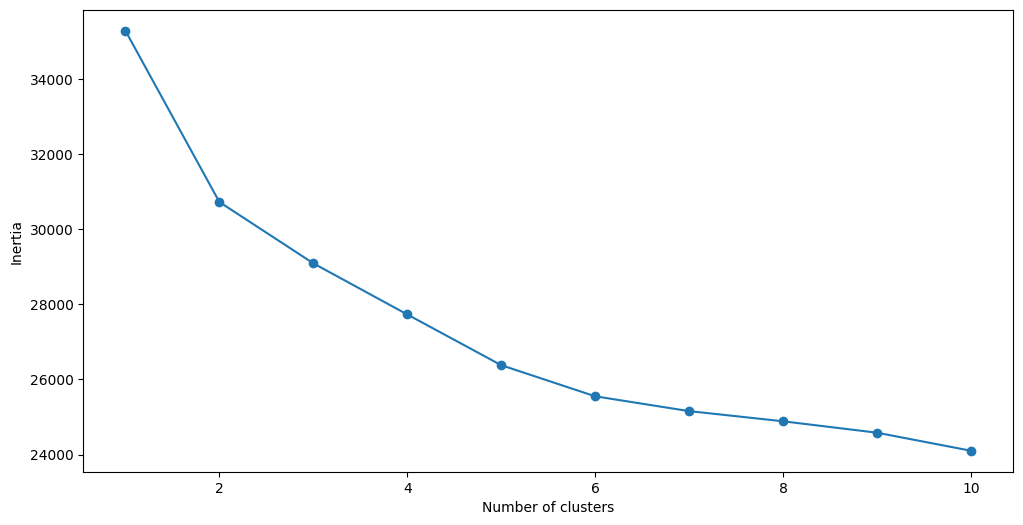

In [5]:
from sklearn.cluster import KMeans

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
test_clusters = 10
for cluster in range(1,test_clusters+1):
    kmeans = KMeans(n_clusters=cluster, n_init="auto")
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,test_clusters+1), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(frame.Cluster[1::2]);

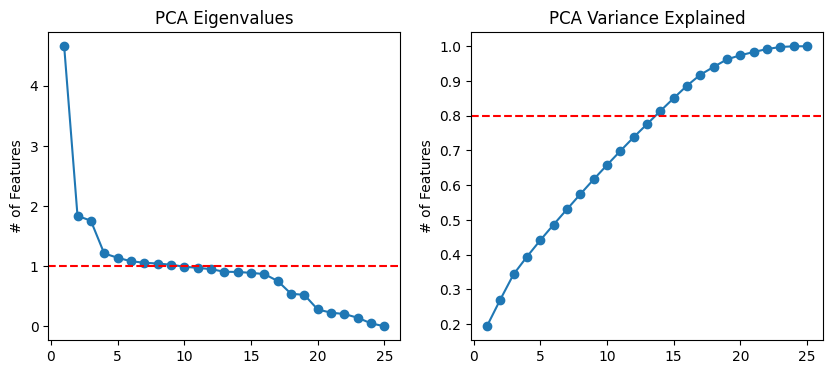

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(data_cl.columns)).fit(data_scaled)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1,len(data_cl.columns)+1), pca.explained_variance_, '-o')
plt.axhline(y=1, color='r', linestyle='--')
plt.ylabel("Eigenvalues")
plt.ylabel("# of Features")
plt.title("PCA Eigenvalues")

plt.subplot(1,2,2)
plt.plot(range(1,len(data_cl.columns)+1), pca.explained_variance_ratio_.cumsum(), '-o')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.ylabel("% Variance Explained")
plt.ylabel("# of Features")
plt.title("PCA Variance Explained")
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

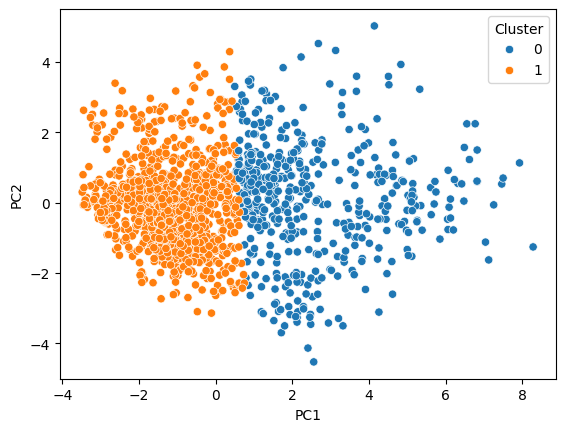

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'])

kmeans2 = KMeans(n_clusters=2, n_init="auto").fit(data_scaled)

pc_transformation['Cluster'] = pd.Categorical(kmeans2.labels_)

sns.scatterplot(data=pc_transformation, x="PC1", y="PC2", hue="Cluster")

<Axes: xlabel='PC1', ylabel='PC2'>

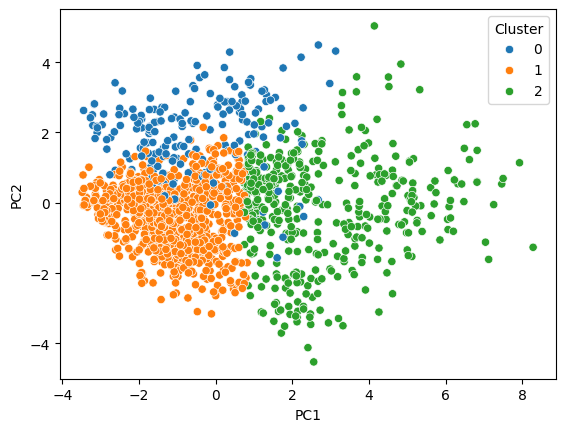

In [8]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'])

kmeans3 = KMeans(n_clusters=3, n_init="auto").fit(data_scaled)

pc_transformation['Cluster'] = pd.Categorical(kmeans3.labels_)

sns.scatterplot(data=pc_transformation, x="PC1", y="PC2", hue="Cluster")

<Axes: xlabel='PC1', ylabel='PC2'>

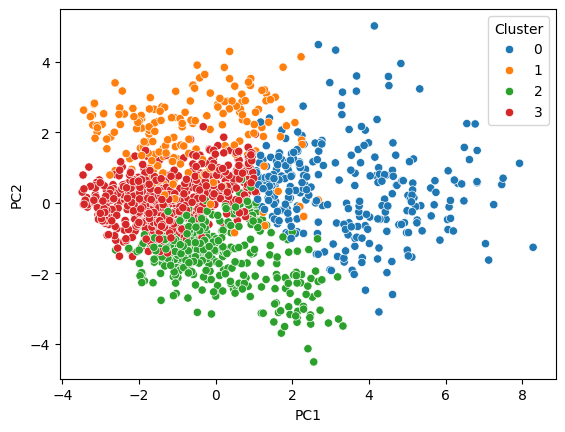

In [9]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'])

kmeans4 = KMeans(n_clusters=4, n_init="auto").fit(data_scaled)

pc_transformation['Cluster'] = pd.Categorical(kmeans4.labels_)

sns.scatterplot(data=pc_transformation, x="PC1", y="PC2", hue="Cluster")

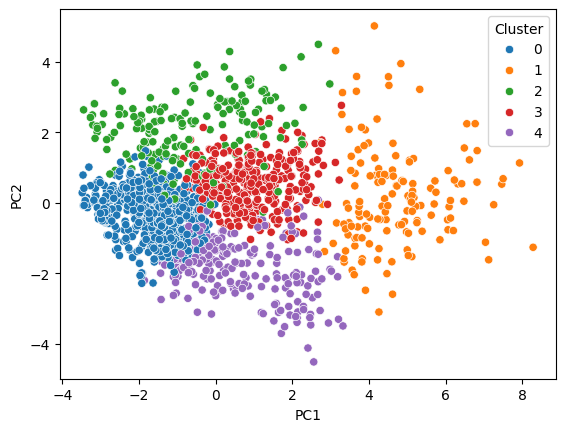

In [10]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'])

kmeans5 = KMeans(n_clusters=5, n_init="auto").fit(data_scaled)

pc_transformation['Cluster'] = pd.Categorical(kmeans5.labels_)

sns.scatterplot(data=pc_transformation, x="PC1", y="PC2", hue="Cluster")
plt.show()

In [11]:
data_labels = data.copy()
data_labels['PC1'] = pc_transformation.PC1
data_labels['PC2'] = pc_transformation.PC2
data_labels['2_clusters'] = kmeans2.labels_.astype(str)
data_labels['3_clusters'] = kmeans3.labels_.astype(str)
data_labels['4_clusters'] = kmeans4.labels_.astype(str)
data_labels['5_clusters'] = kmeans5.labels_.astype(str)

data_labels.to_csv("hr_data_clusters.csv", index=False)

In [12]:
data_labels.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [13]:
data_clusters = pd.read_csv("https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/hr_data_clusters.csv")
data_clusters.iloc[:,-4:] = data_clusters.iloc[:,-4:].astype(str)
data_clusters.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [14]:
## import pandas as pd
from viz import *

# Leear archivo de datos
data_clusters = pd.read_csv("https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/hr_data_clusters.csv")

# Transformar las (últimas 4) columnas con los clusters en categóricas 
data_clusters.iloc[:,-4:] = data_clusters.iloc[:,-4:].astype(str)

all_data = {"HR Clusters": data_clusters
           }

plot_data(all_data)

interactive(children=(Dropdown(description='ds', options=('HR Clusters',), value='HR Clusters'), Dropdown(desc…

In [15]:
data_labels.groupby(["2_clusters", "Attrition"]).describe().TotalWorkingYears

count       mean       std  min   25%   50%    75%   max
2_clusters Attrition                                                          
0          No         437.0  19.038902  7.549886  7.0  12.0  18.0  24.00  38.0
           Yes         46.0  17.195652  8.526090  8.0  10.0  14.0  22.75  40.0
1          No         796.0   7.923367  4.269583  0.0   5.0   8.0  10.00  25.0
           Yes        191.0   6.089005  4.749231  0.0   2.0   6.0   8.00  23.0

In [17]:
from sklearn.ensemble import RandomForestClassifier

X = data_cl
y = data_labels["2_clusters"]

rf = RandomForestClassifier(n_estimators=100, random_state=123)
# cambiar valores de acuerdo al numero de columnas en el dataset
rf.fit(X, y)

RandomForestClassifier(random_state=123)

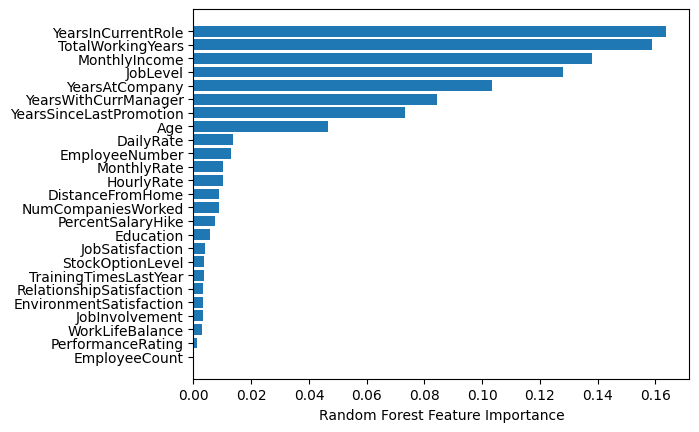

In [18]:
sns.reset_defaults()
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][:], rf.feature_importances_[sorted_idx][:])
plt.xlabel("Random Forest Feature Importance")
plt.show()